# Page contributions by country

We are interested in knowing the relative importance that a given Wikipedia page has for a country.

For each revision made to the page of interest will fall in one of the following categories:
 - Assigned it to a country, based on its IP address
 - Assigned it to a country, based on its username
 - Discarded it, due the user was a bot
 - Unable to determine information

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import btb.utils.tools as btbtools
import btb.utils.wikiquery as wq

import mwclient
from __future__ import division

In [3]:
wiki = mwclient.Site('en.wikipedia.org')
bots = wq.getAllBots(wiki)

Therefore, for a given wikipedia page, we will be able to identify:

 - A proportion of revisions for which their country is known
  - ...via their IP
  - ...via their user info
 - A proportion of revisions for which country is unknown
 - A proportion of revisions which can be ignored
 
We can determine the confidence we can have in any conclusions drawn from this data, as a ratio of know over the total amount of available data (after revisions which can be ignored have been removed).

The following example shows the break down of known data for a given page.

Known via IP          =   4,132
Known via username    =   1,241
Ignored (Bots)        =     380
Unknown               =   3,383
Total                 =   9,136

Confidence: 61.3636%


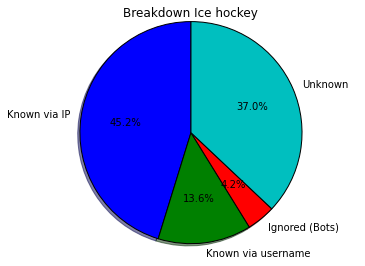

In [4]:
pageTitle = 'Ice hockey'
ips, usrs, nrevs = wq.getContributionsForPage(wiki, pageTitle)
byCC, conf, nIP, nUsr, nBot, nUnkn = btbtools.prepareData(ips, usrs, bots)
fracs = [ nIP, nUsr, nBot, nUnkn ]
labels = ['Known via IP', 
          'Known via username', 
          'Ignored (Bots)', 
          'Unknown']
pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
title('Breakdown ' + pageTitle)
axis('equal');

for l,f in zip(labels,fracs):
    print '{:20}  =  {:6,}'.format(l,f)
print '{:20}  =  {:6,}'.format('Total',nrevs)
print '\nConfidence: {:2.4f}%'.format(conf * 100)

In [5]:
def buildPieChart(wiki, pageTitle):
    '''
    Construct the a pie chart for data on a given wikipedia page. Chart shows the 
    percentage of revisions with unknown sources, revisions by bots, and revisions
    from countries which contribute more than 1% of the total. Countries which 
    contribute less than 1% are aggregated together.
    
    Parameters:
    wiki         wmclient.Site object
    pageTitle    Title of the page of interest.
    '''
    ips, usrs, nrevs = wq.getContributionsForPage(wiki, pageTitle)
    knwRevs, conf, nIP, nUsr, nBot, nUnkn = btbtools.prepareData(ips, usrs, bots)

    # Work with percentages of number or revisions
    asPct = lambda(val): val / nrevs * 100
    
    # Include revisions with unknown sources and from bots
    fracs = [ asPct(nUnkn), asPct(nBot) ]
    labels = [ 'Unknown', 'Ignored (Bots)' ]

    # Country Code and count for known data
    knwCode =  np.array(knwRevs.keys()  )
    knwCount = np.array(knwRevs.values())

    # Make into descending lists
    idx = knwCount.argsort()
    idx = idx[::-1]
    knwCode  = knwCode[idx]
    knwCount = asPct(knwCount[idx])

    # Include in chart countries which contribute more than 1%
    pct = 1.0   # PCT = 0.01 (1%) contribution
    for code,count in zip(knwCode,knwCount):
        if count>=pct:
            labels.append(code)
            fracs.append(count)

    # Lump together contributions of all countries which contribute less than 1%
    pctOthers = sum(knwCount[knwCount<pct])
    labels.append('Other')
    fracs.append(pctOthers)

    # Draw chart
    pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
    title('Breakdown ' + pageTitle + '\n')
    axis('equal');

    # Print contributions of countries which contribute more than 0.5%
    print 'Confidence: {:2.4f}%'.format(conf * 100)
    print '\nContribution by country'
    for code,count in zip(knwCode,knwCount):
        if count>0.05:
            print '{:}  =  {:6.2f}%'.format(code,count)

Confidence: 46.8537%

Contribution by country
US  =   35.91%
CA  =    3.51%
UK  =    2.54%
AU  =    0.90%
DE  =    0.55%
NL  =    0.48%
IE  =    0.18%
IN  =    0.16%
RO  =    0.14%
NZ  =    0.14%
KR  =    0.11%
FI  =    0.11%
FR  =    0.10%
MX  =    0.10%
SE  =    0.10%
PK  =    0.09%
NO  =    0.08%
ES  =    0.08%
ID  =    0.08%
IT  =    0.06%
VE  =    0.06%
CL  =    0.06%
BR  =    0.05%


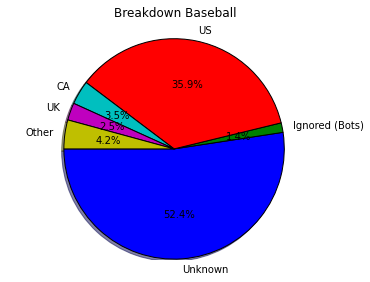

In [6]:
buildPieChart(wiki, 'Baseball')

Confidence: 57.8165%

Contribution by country
US  =   23.94%
UK  =   13.56%
AU  =   10.88%
CA  =    3.76%
NL  =    0.50%
NZ  =    0.48%
DE  =    0.48%
IE  =    0.47%
HK  =    0.32%
IN  =    0.29%
IT  =    0.24%
SE  =    0.23%
MX  =    0.22%
NO  =    0.19%
GR  =    0.18%
ES  =    0.17%
DK  =    0.14%
FR  =    0.11%
HU  =    0.08%
MY  =    0.08%
RO  =    0.06%
MU  =    0.06%
FI  =    0.06%
JP  =    0.06%
PH  =    0.06%
AE  =    0.05%
CH  =    0.05%
BR  =    0.05%


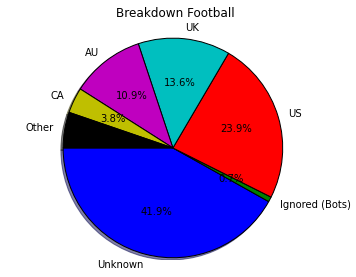

In [7]:
buildPieChart(wiki, 'Football')

Confidence: 53.8610%

Contribution by country
US  =   40.37%
UK  =    3.46%
CA  =    2.57%
AU  =    1.77%
DE  =    0.53%
NZ  =    0.46%
NL  =    0.30%
NO  =    0.27%
IE  =    0.26%
FI  =    0.25%
SE  =    0.21%
IN  =    0.18%
FR  =    0.17%
DK  =    0.17%
JP  =    0.17%
MX  =    0.15%
IT  =    0.15%
BR  =    0.13%
ES  =    0.11%
IL  =    0.08%
AT  =    0.07%
CL  =    0.06%
MU  =    0.06%


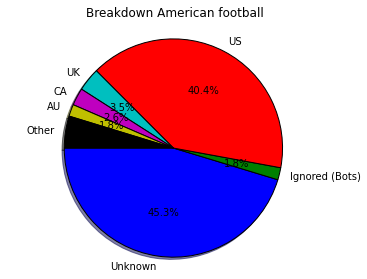

In [8]:
buildPieChart(wiki, 'American football')

Confidence: 49.8354%

Contribution by country
US  =   22.14%
AU  =    7.71%
UK  =    7.07%
CA  =    3.38%
RU  =    1.16%
NL  =    0.86%
DE  =    0.61%
IN  =    0.56%
NZ  =    0.53%
IE  =    0.42%
MX  =    0.42%
SE  =    0.33%
BR  =    0.27%
JO  =    0.25%
NO  =    0.24%
JP  =    0.23%
IT  =    0.21%
FR  =    0.20%
SG  =    0.14%
BE  =    0.13%
HK  =    0.13%
KR  =    0.13%
MU  =    0.12%
AT  =    0.12%
ES  =    0.09%
MY  =    0.09%
DK  =    0.08%
AE  =    0.07%
BG  =    0.07%
AR  =    0.06%
RS  =    0.06%
PH  =    0.06%
GR  =    0.06%
RO  =    0.06%
PL  =    0.06%
CO  =    0.06%
PT  =    0.05%
PK  =    0.05%
IL  =    0.05%
CH  =    0.05%
ZA  =    0.05%


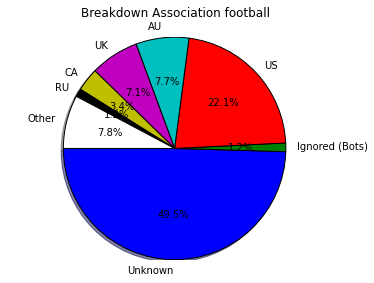

In [9]:
buildPieChart(wiki, 'Association football')  # Soccer

Confidence: 57.3159%

Contribution by country
US  =   27.13%
UK  =    6.39%
AU  =    6.11%
NL  =    3.67%
CA  =    3.38%
IN  =    1.22%
NZ  =    0.68%
DE  =    0.62%
PH  =    0.42%
ES  =    0.35%
BE  =    0.34%
BR  =    0.30%
IE  =    0.27%
SG  =    0.22%
DZ  =    0.21%
IT  =    0.19%
MX  =    0.19%
FR  =    0.18%
HK  =    0.17%
SE  =    0.17%
AR  =    0.16%
CH  =    0.16%
HR  =    0.16%
CL  =    0.14%
MY  =    0.14%
TH  =    0.14%
CN  =    0.13%
TR  =    0.13%
JP  =    0.11%
FI  =    0.11%
MU  =    0.10%
AT  =    0.10%
AE  =    0.08%
PL  =    0.08%
CO  =    0.08%
PE  =    0.08%
VE  =    0.07%
DK  =    0.07%


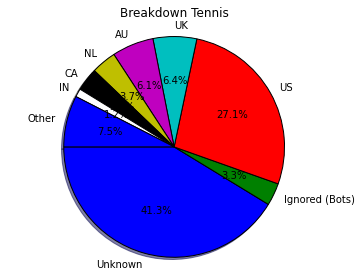

In [10]:
buildPieChart(wiki, 'Tennis')

Confidence: 43.2615%

Contribution by country
AU  =   11.54%
UK  =   10.74%
US  =   10.26%
IN  =    3.77%
CA  =    1.38%
NZ  =    1.35%
DE  =    0.55%
PK  =    0.40%
HK  =    0.32%
NL  =    0.22%
SE  =    0.20%
CN  =    0.18%
ZA  =    0.15%
SG  =    0.13%
PT  =    0.13%
IE  =    0.12%
MU  =    0.12%
TR  =    0.10%
RU  =    0.08%
AE  =    0.07%
HU  =    0.07%
IL  =    0.07%
DK  =    0.07%
JP  =    0.05%
FI  =    0.05%
TH  =    0.05%
FR  =    0.05%
TT  =    0.05%
TW  =    0.05%
NO  =    0.05%


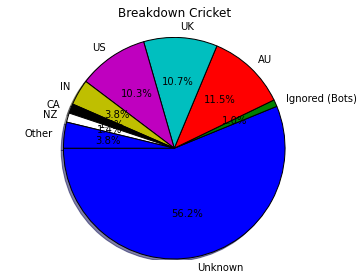

In [11]:
buildPieChart(wiki, 'Cricket')

Confidence: 58.1395%

Contribution by country
UK  =   19.94%
US  =   14.91%
NZ  =    6.27%
AU  =    5.13%
IE  =    1.80%
CA  =    1.23%
SE  =    0.57%
DE  =    0.57%
ES  =    0.57%
NL  =    0.47%
FR  =    0.47%
IN  =    0.38%
BR  =    0.28%
DK  =    0.19%
JP  =    0.19%
CL  =    0.19%
MN  =    0.09%
MU  =    0.09%
HK  =    0.09%
CY  =    0.09%
TW  =    0.09%
PH  =    0.09%
ID  =    0.09%
RO  =    0.09%
PL  =    0.09%
CM  =    0.09%
GH  =    0.09%
KY  =    0.09%
ZA  =    0.09%
GE  =    0.09%
IR  =    0.09%


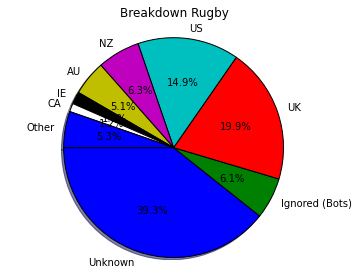

In [12]:
buildPieChart(wiki, 'Rugby')

Confidence: 60.1004%

Contribution by country
US  =   38.28%
CA  =    7.85%
AU  =    3.28%
UK  =    2.46%
NZ  =    2.04%
PH  =    0.69%
NL  =    0.66%
DE  =    0.46%
IN  =    0.36%
ES  =    0.18%
IE  =    0.17%
SE  =    0.16%
BR  =    0.14%
KR  =    0.14%
CL  =    0.11%
FR  =    0.10%
MX  =    0.10%
MY  =    0.09%
NP  =    0.09%
PL  =    0.09%
IT  =    0.09%
SG  =    0.09%
NO  =    0.07%
LT  =    0.06%
HR  =    0.06%


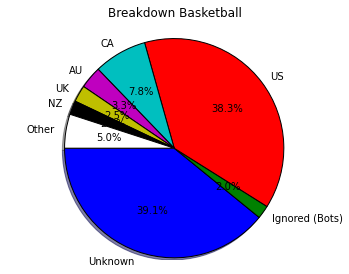

In [13]:
buildPieChart(wiki, 'Basketball')

Confidence: 64.6980%

Contribution by country
US  =   33.72%
UK  =    9.24%
CA  =    4.78%
AU  =    3.95%
NZ  =    1.85%
NL  =    1.66%
DE  =    0.83%
PH  =    0.64%
CL  =    0.57%
IN  =    0.45%
KR  =    0.32%
ES  =    0.32%
CO  =    0.25%
HK  =    0.19%
SA  =    0.19%
TR  =    0.19%
MX  =    0.19%
SE  =    0.13%
PK  =    0.13%
BR  =    0.13%
FR  =    0.13%
FI  =    0.13%
BE  =    0.13%
IL  =    0.13%
EE  =    0.13%
SG  =    0.13%
MU  =    0.13%
CR  =    0.06%
DK  =    0.06%
BH  =    0.06%
MK  =    0.06%
GI  =    0.06%
TH  =    0.06%
CH  =    0.06%
RU  =    0.06%
ZA  =    0.06%
NO  =    0.06%
TT  =    0.06%
IT  =    0.06%
PL  =    0.06%


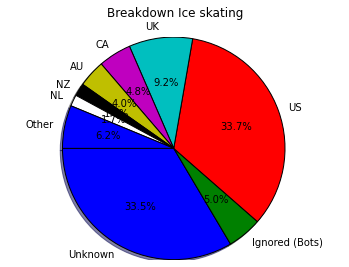

In [14]:
buildPieChart(wiki, 'Ice skating')

Confidence: 60.0463%

Contribution by country
US  =   26.89%
UK  =    7.03%
AU  =    3.92%
NL  =    3.38%
CA  =    3.17%
PH  =    1.50%
IN  =    1.34%
DE  =    0.70%
ID  =    0.70%
NZ  =    0.64%
NO  =    0.43%
DK  =    0.27%
TR  =    0.27%
SE  =    0.27%
IE  =    0.27%
SG  =    0.27%
BB  =    0.21%
PE  =    0.21%
GR  =    0.21%
MX  =    0.21%
PK  =    0.21%
QA  =    0.21%
ZA  =    0.21%
ES  =    0.16%
MU  =    0.16%
BR  =    0.16%
JO  =    0.16%
TH  =    0.16%
RO  =    0.16%
SA  =    0.16%
NP  =    0.11%
EC  =    0.11%
CN  =    0.11%
RU  =    0.11%
LT  =    0.11%
HK  =    0.11%
BS  =    0.11%
PT  =    0.11%
CO  =    0.11%
AE  =    0.11%
MY  =    0.05%
BE  =    0.05%
HU  =    0.05%
HR  =    0.05%
NG  =    0.05%
LC  =    0.05%
TT  =    0.05%
KE  =    0.05%
LK  =    0.05%
FI  =    0.05%
EG  =    0.05%
CH  =    0.05%
CL  =    0.05%
MA  =    0.05%
IR  =    0.05%
IT  =    0.05%
BD  =    0.05%


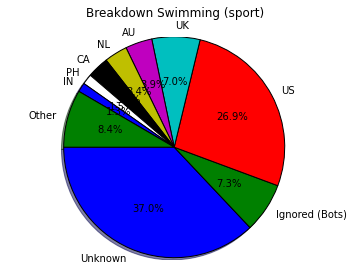

In [15]:
buildPieChart(wiki, 'Swimming (sport)')

Confidence: 50.7522%

Contribution by country
US  =   21.52%
AU  =    9.00%
CA  =    2.75%
UK  =    2.64%
JP  =    2.29%
DE  =    0.85%
IN  =    0.66%
ES  =    0.62%
BR  =    0.58%
DK  =    0.58%
CN  =    0.54%
TR  =    0.50%
NZ  =    0.50%
IT  =    0.50%
NL  =    0.47%
CL  =    0.47%
SE  =    0.43%
HU  =    0.39%
AR  =    0.39%
BE  =    0.31%
FI  =    0.31%
CH  =    0.31%
SG  =    0.23%
HK  =    0.19%
MU  =    0.19%
MX  =    0.16%
MY  =    0.16%
PH  =    0.16%
RS  =    0.16%
PT  =    0.16%
TW  =    0.16%
RU  =    0.12%
AT  =    0.12%
FR  =    0.12%
SK  =    0.12%
HR  =    0.12%
EC  =    0.12%
MT  =    0.08%
BG  =    0.08%
KR  =    0.08%
IE  =    0.08%
CR  =    0.08%
ZA  =    0.08%
LV  =    0.08%


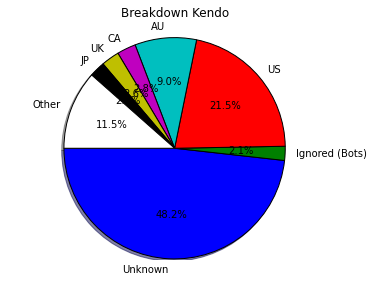

In [16]:
buildPieChart(wiki, 'Kendo')

# Expectations
Actually, also according to [Wikimedia statistics](http://stats.wikimedia.org/wikimedia/squids/SquidReportPageEditsPerLanguageBreakdown.htm), there is an 'expected' number of edits from different countries on different articles. So let's compare the number of edits with these expectations. The overal percentage of contributions for each country is available on the *wikiquery* module as a dictionary returned by the *getTotalContributions()* method.

The following chart shows a the percentage of overall contributions from each country to wikipedia.

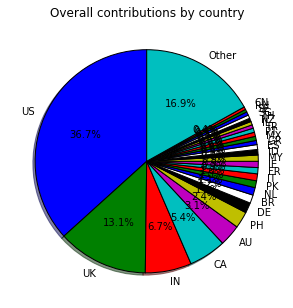

In [15]:
expEdits = wq.getTotalContributions()
ccs =  np.array(expEdits.keys()  )
revs = np.array(expEdits.values())

idx = revs.argsort()
idx = idx[::-1]
ccs = ccs[idx].tolist()
revs = revs[idx].tolist()

revs.append(1 - sum(revs))
ccs.append('Other')

figure(figsize=(5,5))
pie(revs, labels=ccs, autopct='%1.1f%%', shadow=True, startangle=90)
title('Overall contributions by country');

This data may be better represented as bar chart.

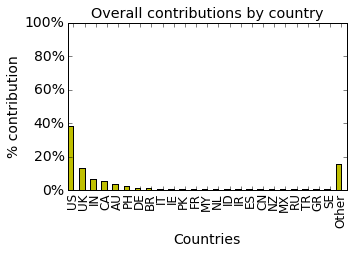

In [35]:
import matplotlib.ticker as mtick

ind = arange(len(ccs))
width = 0.5
expVal = np.array(revs) * 100
tags   = ccs

figure(figsize=(5,3))
bar(ind           , expVal, width=width, color='y')
xticks(ind + width, tags  , rotation=90, fontsize=12);
axis([0, len(ccs), 0, 100])
xlabel('Countries', fontsize=14)
ylabel('% contribution', fontsize=14)

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
gca().yaxis.set_major_formatter(yticks)
for tick in gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

savePDF = '../ieee escience/figs/countryContributions.pdf'
savefig(savePDF,bbox_inches='tight', pad_inches=0)
title('Overall contributions by country');

## Expectations for other languages
Wikipedia versions for other languages (such as french and dutch) is also available.

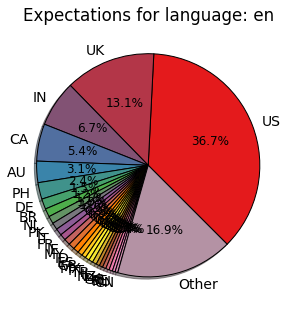

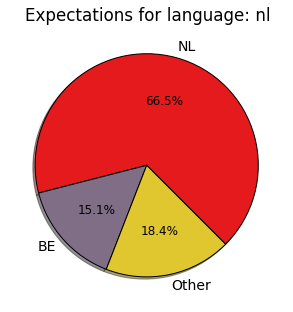

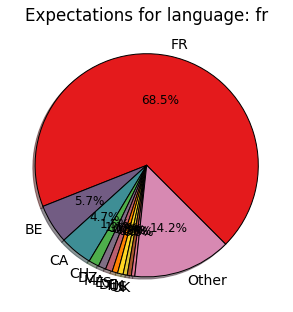

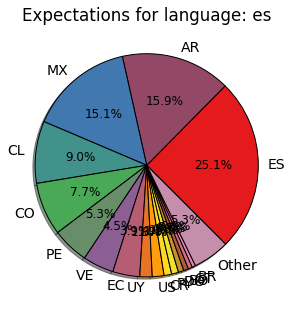

In [16]:
for lang in [ 'en', 'nl', 'fr', 'es' ]:
    expEdits = wq.getTotalContributions(lang=lang)
    ccs =  np.array(expEdits.keys()  )
    revs = np.array(expEdits.values())

    idx = revs.argsort()
    idx = idx[::-1]
    ccs = ccs[idx].tolist()
    revs = revs[idx].tolist()

    revs.append(1 - sum(revs))
    ccs.append('Other')

    rcParams['font.size'] = 14.0
    figure(figsize=(5,5))
    cs = cm.Set1(np.arange(len(ccs))/len(ccs))
    pie(revs, labels=ccs, autopct='%1.1f%%', shadow=True, startangle=-45, colors=cs, textprops={'fontsize': 12})

    savePDF = '../ieee escience/figs/ExpectationPie_' + lang + '.pdf'
    savefig(savePDF,bbox_inches='tight', pad_inches=0)
    title('Expectations for language: ' + lang)
    

# Matching expectations
At this point, we have described the contributions made by any given country to a particular page, and the volume of contributions expected from a country. It is possible to combine these two pieces of information in order to provide an assesment of the interest expressed by the country on a particular topic.

After removing unknown data and bots, the percentage of contributions from each country were compared with the expected contribution. These contributions were normalized, so relatively small contributing countries were not overshadowed by dominant countries (namely US and UK).

The following bar charts illustrate the relative interest from various countries on a range of topics. For each topic, two graphs are shown: the first graph shows the percentage of contributions, compared with the expected percentage of contributions; the second graph shows the normalized contributions from each country.

Notice that countries where their expected contribution is unknown were discarded. This is not ideal, however, these countries are outside our area of interest and therefore it is an acceptable omission.

In [32]:
def plotEditBars(pageTitle):
    ips, usrs, nrevs = wq.getContributionsForPage(wiki, pageTitle)
    knwRevs, conf, nIP, nUsr, nBot, nUnkn = btbtools.prepareData(ips, usrs, bots)

    expEdits = wq.getTotalContributions()
    cmpEdits = btbtools.compareEdits(expEdits, knwRevs)

    tags   = np.array(cmpEdits.keys())
    cmpVals = np.array(cmpEdits.values())

    # Sort descending by expected value
    sortIdx = cmpVals[:,0].argsort()
    sortIdx = sortIdx[::-1]
    tags   = tags[sortIdx]
    expVal = cmpVals[sortIdx,0]
    actVal = cmpVals[sortIdx,1]
    cmpVal = cmpVals[sortIdx,2]

    # Ignore entries where overall contributions are unknown
    tags   = tags[expVal>0]
    actVal = actVal[expVal>0]
    cmpVal = cmpVal[expVal>0]
    expVal = expVal[expVal>0]

    # Format bar charts
    width = 0.35
    N = len(tags)
    ind = np.arange(N)
    
    # figure(figsize=(6,4))
    figure(figsize=(12,4))
    bar(ind           , expVal*100, width=width, color='y', label='Expectation')
    bar(ind + width   , actVal*100, width=width, color='r', label='Contribution')
    xticks(ind + width, tags  , rotation=90);
    axis([0, N, 0, 100])
    legend()
    title(pageTitle)
    fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
    yticks = mtick.FormatStrFormatter(fmt)
    gca().yaxis.set_major_formatter(yticks)
    xlabel('Countries')
    ylabel('% contribution')

    # figure(figsize=(6,4))
    figure(figsize=(12,4))
    bar(ind + width   , cmpVal, width=width, color='b', label='$I(e_c,a_c)$')
    xticks(ind + width, tags  , rotation=90);
    plot([0,N],[0,0],'k:')
    axis([0, N, -1, 1])
    # legend()
    title(pageTitle)
    xlabel('Countries')
    ylabel('$I(e_c,a_c)$')
    
    country = 'CA'
    print 'Title       : ',pageTitle
    print 'Country     : ',country
    print 'exp,act,cmp : %2.3f,%2.3f,%2.3f'%cmpEdits[country]
    country = 'NL'
    print 'Title       : ',pageTitle
    print 'Country     : ',country
    print 'exp,act,cmp : %2.3f,%2.3f,%2.3f'%cmpEdits[country]

    
#import matplotlib.ticker as mtick
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf')
#plotEditBars('Ice hockey')

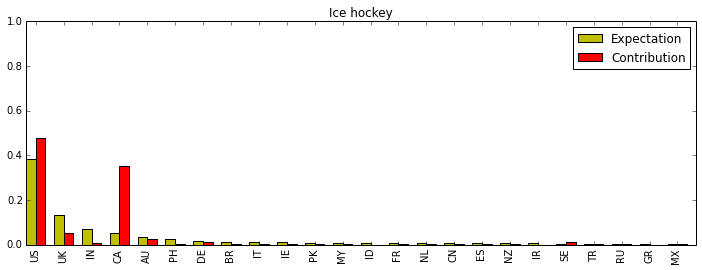

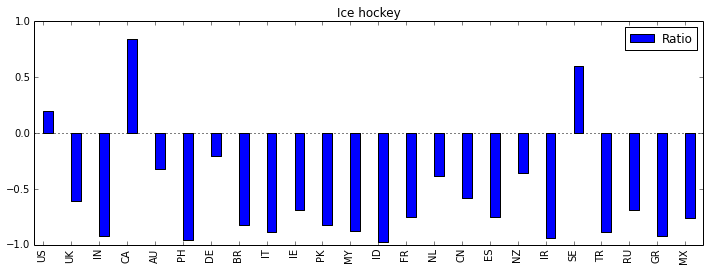

In [5]:
plotEditBars('Ice hockey')

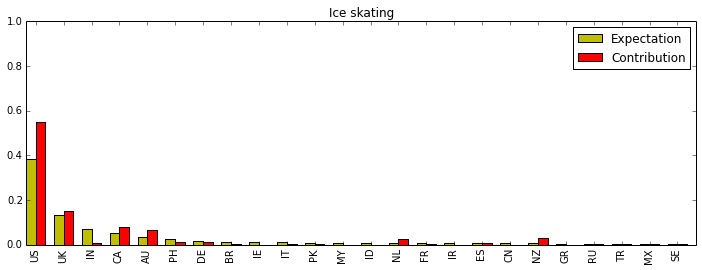

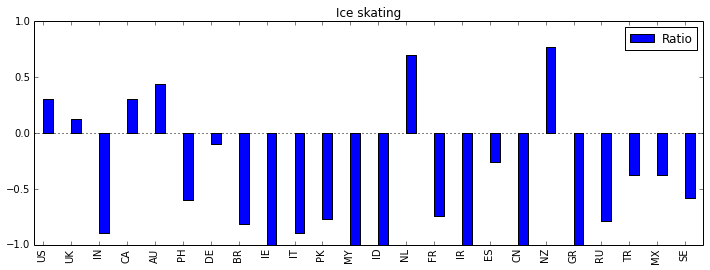

In [6]:
plotEditBars('Ice skating')

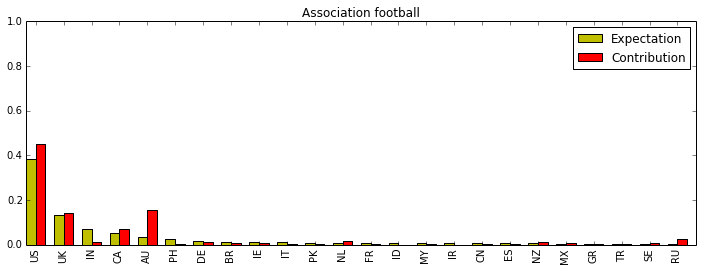

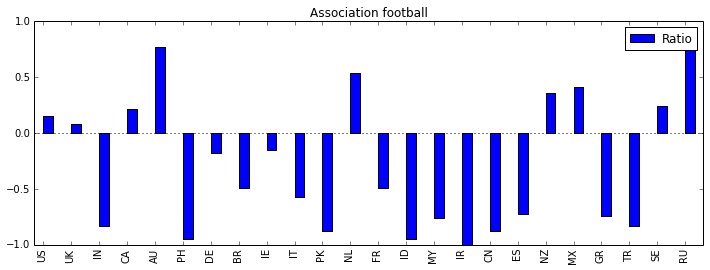

In [57]:
plotEditBars('Association football')

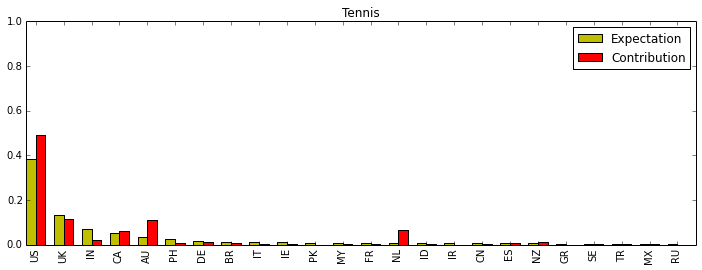

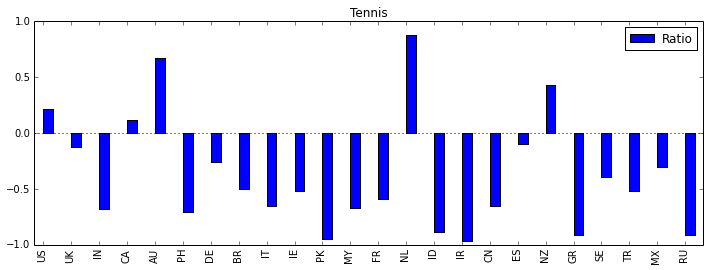

In [58]:
plotEditBars('Tennis')

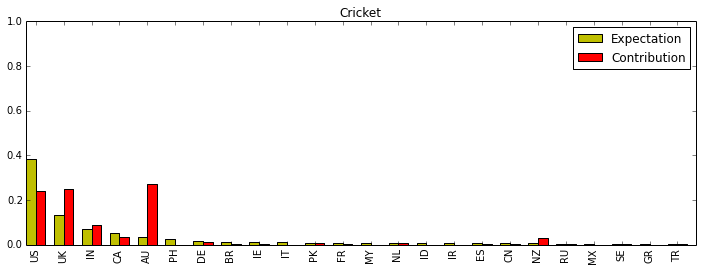

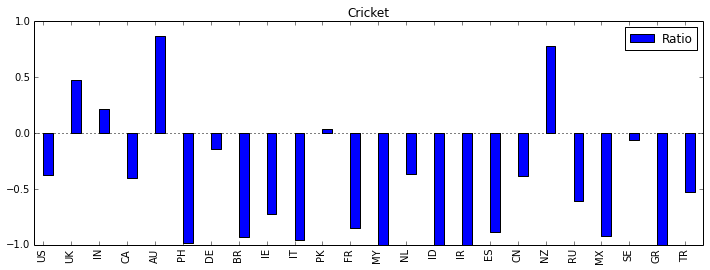

In [59]:
plotEditBars('Cricket')

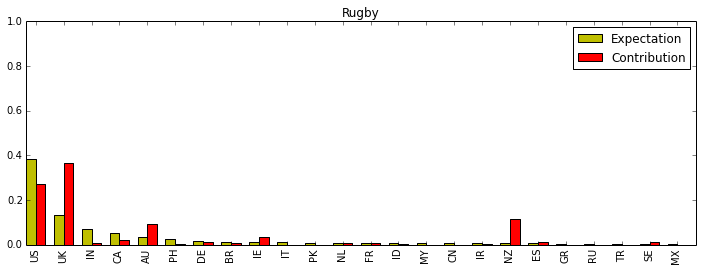

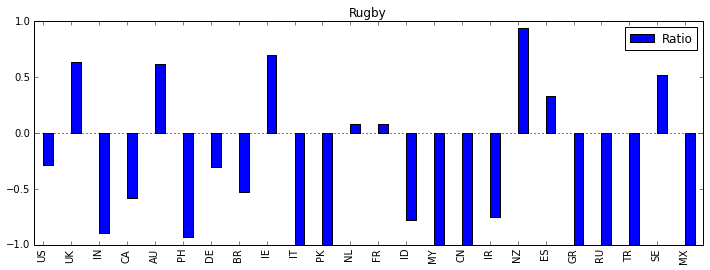

In [60]:
plotEditBars('Rugby')

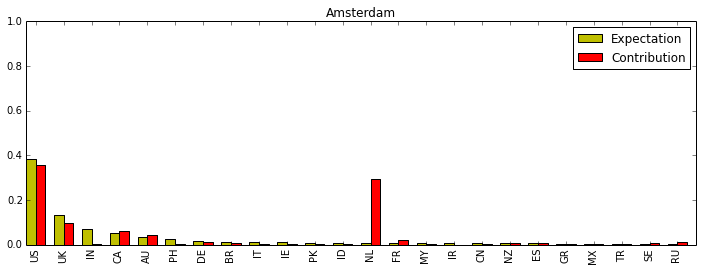

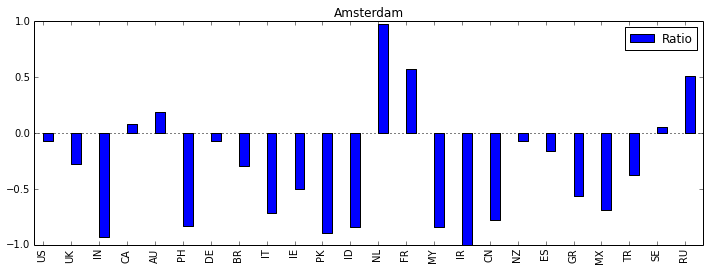

In [61]:
plotEditBars('Amsterdam')

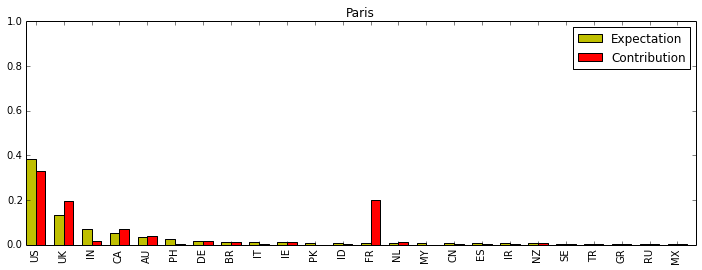

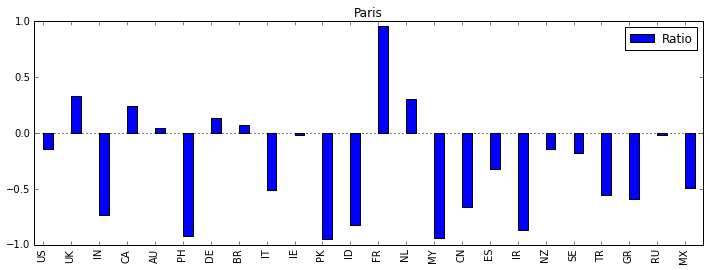

In [27]:
plotEditBars('Paris')

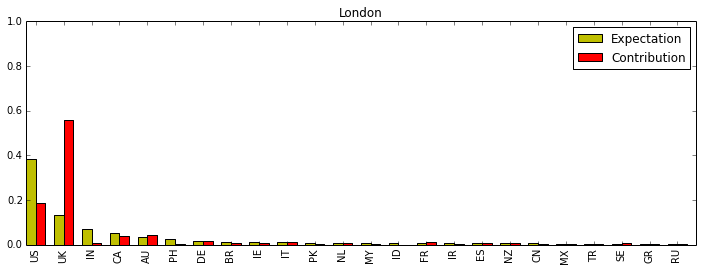

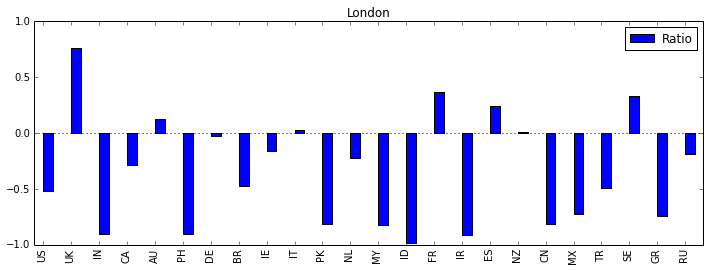

In [28]:
plotEditBars('London')

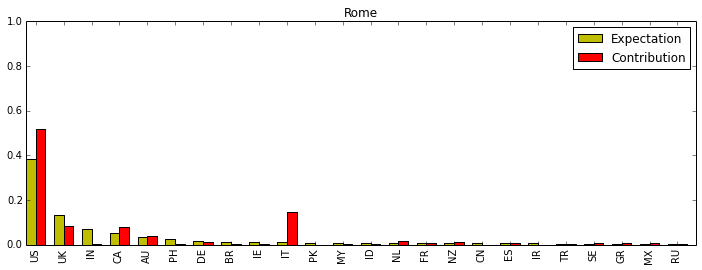

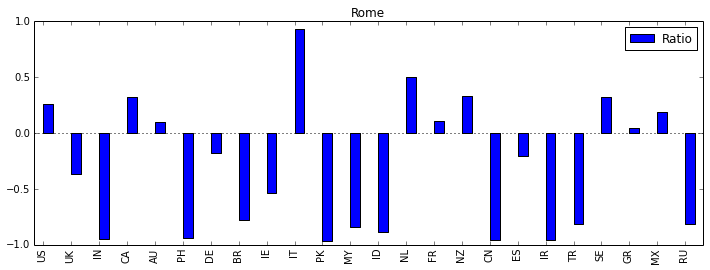

In [29]:
plotEditBars('Rome')

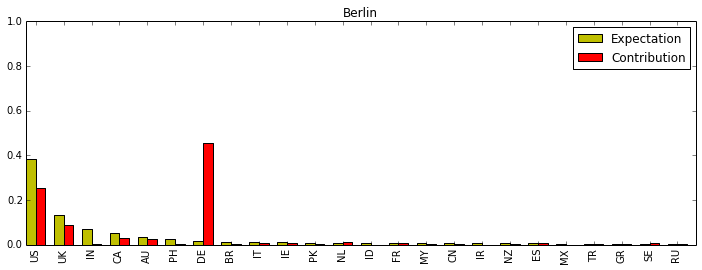

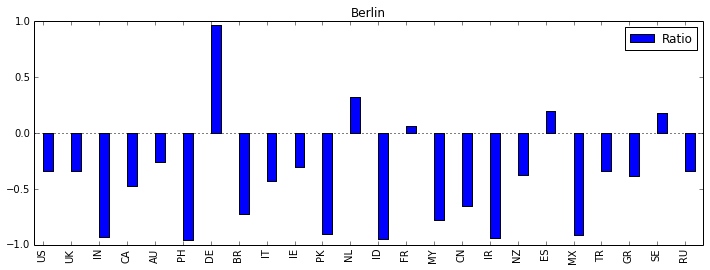

In [30]:
plotEditBars('Berlin')

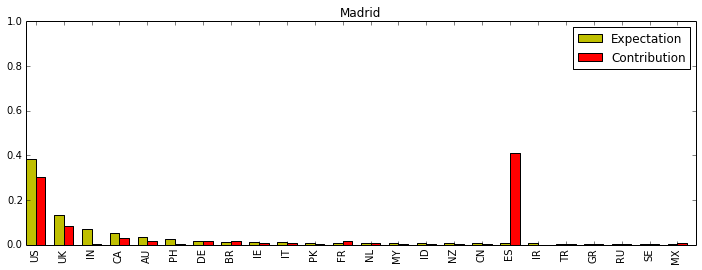

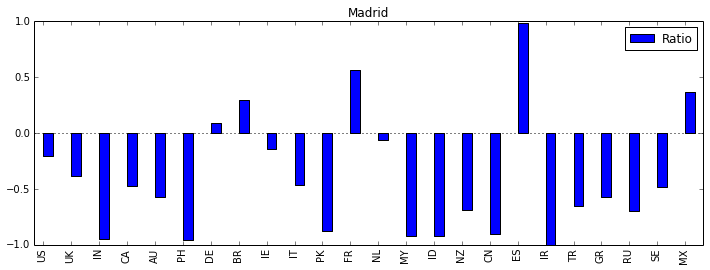

In [31]:
plotEditBars('Madrid')

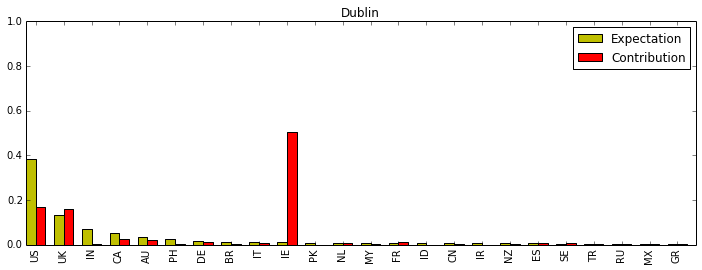

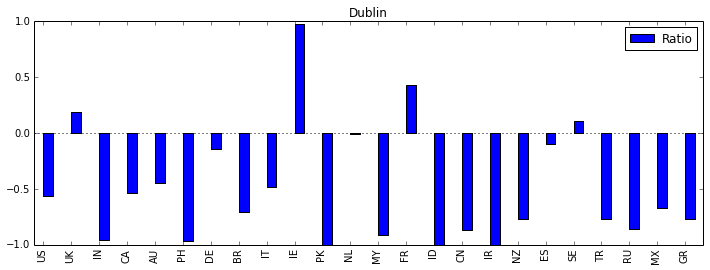

In [32]:
plotEditBars('Dublin')

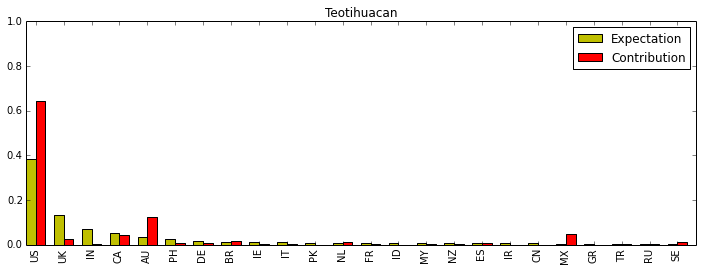

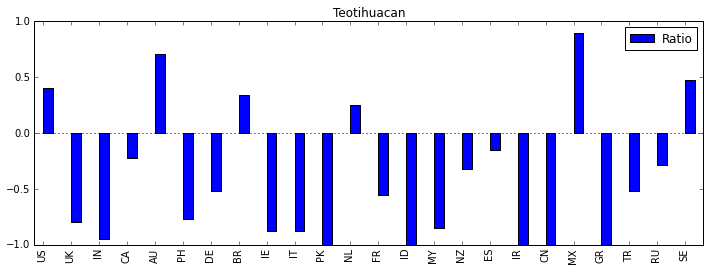

In [33]:
plotEditBars('Teotihuacan')